In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import uproot3
import h5py
import ROOT as rt
from tqdm import tqdm as tqdm
import copy
import math

Welcome to JupyROOT 6.26/10


In [2]:
dataS = 'diTracks_KsLambda_addMoreDetAssoc_BD2021'
pathS = '/Volumes/Buio/na62/data/diTracks_KsLambda/'
version = '_acceptance'#'_skimmed'
pathPlots = './plotsProb/'

In [3]:
pd_read = pd.read_hdf(pathS + dataS + version + '.h5')

In [4]:
pd_read['Vertex_pos_R']     = (pd_read['Vertex_pos.fX']**2 + pd_read['Vertex_pos.fY']**2)**(1/2)
#pd_read['Vertex_pos_R']     = pd_read['Vertex_pos_R'].apply(lambda x:x*0.001)
pd_read['Vertex_pos.fZ']    = pd_read['Vertex_pos.fZ'].apply(lambda x:x*0.001)
pd_read['Vertex_pos_R_tax'] = (pd_read['Vertex_X_custom']**2 + pd_read['Vertex_Y_custom']**2)**(1/2)
#pd_read['Vertex_pos_R_tax'] = pd_read['Vertex_pos_R_tax'].apply(lambda x:x*0.001)
pd_read['Vertex_X_custom']  = pd_read['Vertex_X_custom'].apply(lambda x:x*0.001)
pd_read['Vertex_Y_custom']  = pd_read['Vertex_Y_custom'].apply(lambda x:x*0.001)
pd_read['Vertex_Z_custom']  = pd_read['Vertex_Z_custom'].apply(lambda x:x*0.001)

In [5]:
upCR = (pd_read['CDA_tlcda_custom']>150) & (pd_read['Vertex_Z_custom'] > -4) & (pd_read['Vertex_Z_custom'] < 50)
sideCR = (pd_read['Vertex_Z_custom'] < -4) | (pd_read['Vertex_Z_custom'] > 50)
pd_outCR = pd_read[upCR | sideCR]

In [6]:
Trigger_Selection = (pd_outCR['Trigger_LKr']==True) & (pd_outCR['Trigger_H2']==True)
Baseline_Selection = (pd_outCR['Track1_nChambers'] >2) & (pd_outCR['Track2_nChambers'] >2) & (pd_outCR['Track1_chi2']<20) & (pd_outCR['Track2_chi2']<20) & (pd_outCR['Vertex_Chi2']<30)
#Baseline_Selection = Baseline_Selection & (pd_outCR['Track1_MUV1AssociationExists']==True) & (pd_outCR['Track1_MUV2AssociationExists']==True)
#Baseline_Selection = Baseline_Selection & (pd_outCR['Track2_MUV1AssociationExists']==True) & (pd_outCR['Track2_MUV2AssociationExists']==True)
acc_ANTI0 = (pd_outCR['Track1_accANTI0']) & (pd_outCR['Track2_accANTI0'])

In [7]:
#data_skimmed = pd_read[Trigger_Selection & Detector_acceptance_trk1 & Detector_acceptance_trk2 & Baseline_Selection]
data_skimmed = pd_outCR[Trigger_Selection & Baseline_Selection]

In [8]:
charge_TrkTrk = (data_skimmed['Track1_charge']) + (data_skimmed['Track2_charge'])
data_os = data_skimmed[charge_TrkTrk==0]

In [9]:
data_os['Track1_3Momenta.fX'] = data_os['Track1_3Momenta.fX'].apply(lambda x:x*0.001)
data_os['Track1_3Momenta.fY'] = data_os['Track1_3Momenta.fY'].apply(lambda x:x*0.001)
data_os['Track1_3Momenta.fZ'] = data_os['Track1_3Momenta.fZ'].apply(lambda x:x*0.001)
data_os['Track2_3Momenta.fX'] = data_os['Track2_3Momenta.fX'].apply(lambda x:x*0.001)
data_os['Track2_3Momenta.fY'] = data_os['Track2_3Momenta.fY'].apply(lambda x:x*0.001)
data_os['Track2_3Momenta.fZ'] = data_os['Track2_3Momenta.fZ'].apply(lambda x:x*0.001)

In [10]:
data_os.loc[:, 'pi1_CHANTI']  = data_os['Track1_CHANTIAssociationExists']
data_os.loc[:, 'pi2_CHANTI']  = data_os['Track2_CHANTIAssociationExists']

data_os.loc[:, 'pi1_ANTI0']  = data_os['Track1_ANTI0AssociationExists']
data_os.loc[:, 'pi2_ANTI0']  = data_os['Track2_ANTI0AssociationExists']

data_os.loc[:, 'pi1_NewCHOD']  = data_os['Track1_NewCHODAssociationExists']
data_os.loc[:, 'pi2_NewCHOD']  = data_os['Track2_NewCHODAssociationExists']

data_os.loc[:, 'pi1_LKr']      = data_os['Track1_LKrAssociationExists']
data_os.loc[:, 'pi2_LKr']      = data_os['Track2_LKrAssociationExists']

data_os.loc[:, 'pi1_MUV1']     = data_os['Track1_MUV1AssociationExists']
data_os.loc[:, 'pi2_MUV1']     = data_os['Track2_MUV1AssociationExists']

data_os.loc[:, 'pi1_MUV2']     = data_os['Track1_MUV2AssociationExists']
data_os.loc[:, 'pi2_MUV2']     = data_os['Track2_MUV2AssociationExists']

data_os.loc[:, 'pi1_MUV3']     = data_os['Track1_MUV3AssociationExists']
data_os.loc[:, 'pi2_MUV3']     = data_os['Track2_MUV3AssociationExists']

In [11]:
data_os.loc[acc_ANTI0==True,  'acc_ANTI0'] = True
data_os.loc[acc_ANTI0==False, 'acc_ANTI0'] = False

In [12]:
data_os.loc[data_os['Track1_CHODTimeExist']==True, 'trk1_time']   = data_os['Track1_CHODTime']
data_os.loc[data_os['Track2_CHODTimeExist']==True, 'trk2_time']   = data_os['Track2_CHODTime']
data_os.loc[data_os['Track1_CHODTimeExist']==False, 'trk1_time']  = data_os['Track1_NewCHODTime']
data_os.loc[data_os['Track2_CHODTimeExist']==False, 'trk2_time']  = data_os['Track2_NewCHODTime']

In [13]:
data_os.loc[:, 'deltaT_trk1'] = abs(data_os['trk1_time'] - data_os['Trigger_Time'])
data_os.loc[:, 'deltaT_trk2'] = abs(data_os['trk2_time'] - data_os['Trigger_Time'])

In [14]:
data_os.loc[:, 'deltaT_trk12'] = abs(data_os['deltaT_trk1'] - data_os['deltaT_trk2'])

In [15]:
data_os = data_os[(data_os['deltaT_trk1']<5) & (data_os['deltaT_trk2']<5)]

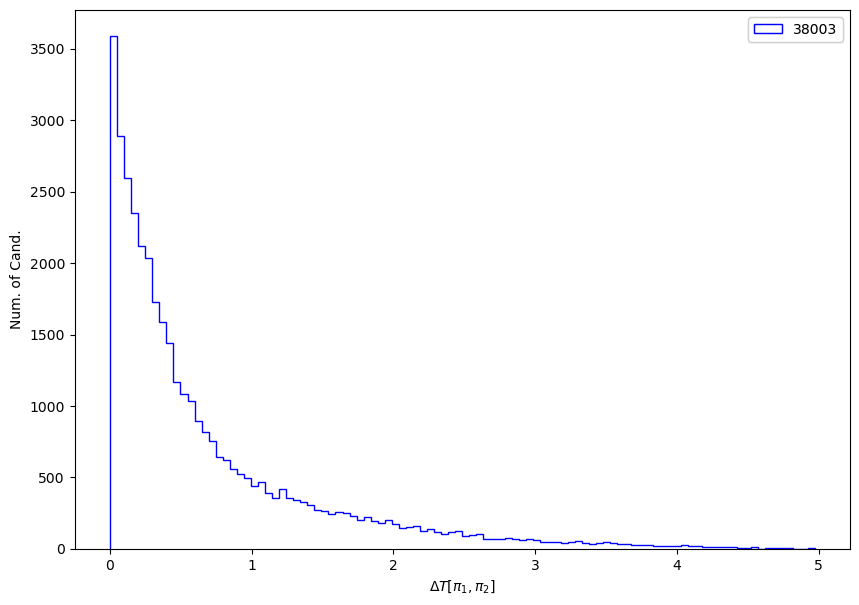

In [16]:
plt.figure(figsize=(10,7))
plt.hist(data_os['deltaT_trk12'],bins=100,log=False,label="", color='blue', histtype='step')
plt.title("")
plt.xlabel('$\Delta T[\pi_{1},\pi_{2}]$')
plt.ylabel('Num. of Cand.')
npipi = data_os['deltaT_trk12']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)
plt.savefig(pathPlots + "deltaT_trk12.png",bbox_inches='tight')

In [17]:
data_os = data_os[data_os['deltaT_trk12']<1.5]

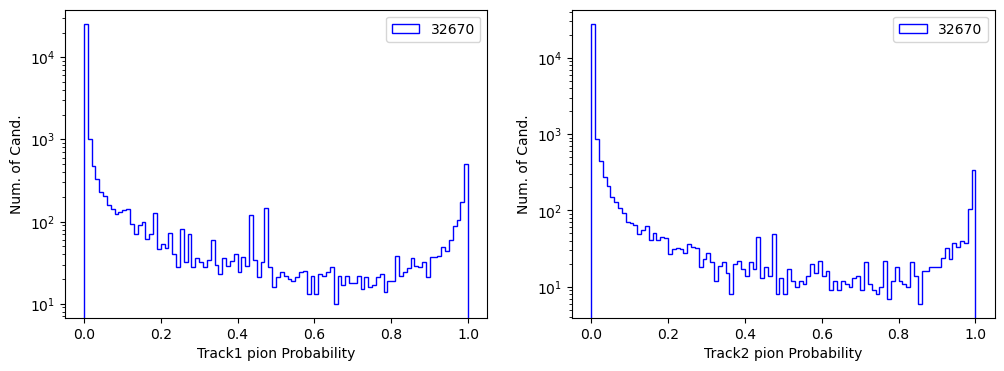

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_os['Track1_Calorimetric_pion_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax1.set_title("diTracks inv. mass")
ax1.set_xlabel('Track1 pion Probability')
ax1.set_ylabel('Num. of Cand.')
ax2.hist(data_os['Track2_Calorimetric_pion_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('Track2 pion Probability')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("two tracks with pion mass")
npipi = data_os['Track1_Calorimetric_pion_PID']
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_os['Track2_Calorimetric_pion_PID']
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "Trk12_pionProb.png",bbox_inches='tight')

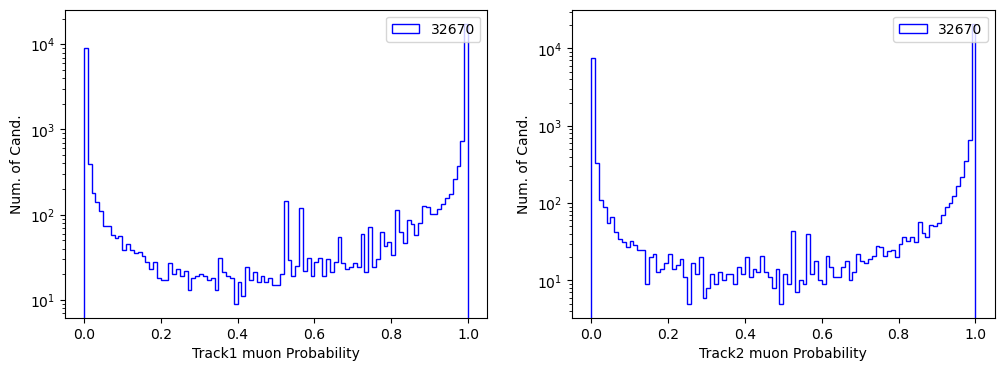

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_os['Track1_Calorimetric_muon_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax1.set_title("diTracks inv. mass")
ax1.set_xlabel('Track1 muon Probability')
ax1.set_ylabel('Num. of Cand.')
ax2.hist(data_os['Track2_Calorimetric_muon_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('Track2 muon Probability')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("two tracks with pion mass")
npipi = data_os['Track1_Calorimetric_muon_PID']
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_os['Track2_Calorimetric_muon_PID']
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "Trk12_muonProb.png",bbox_inches='tight')

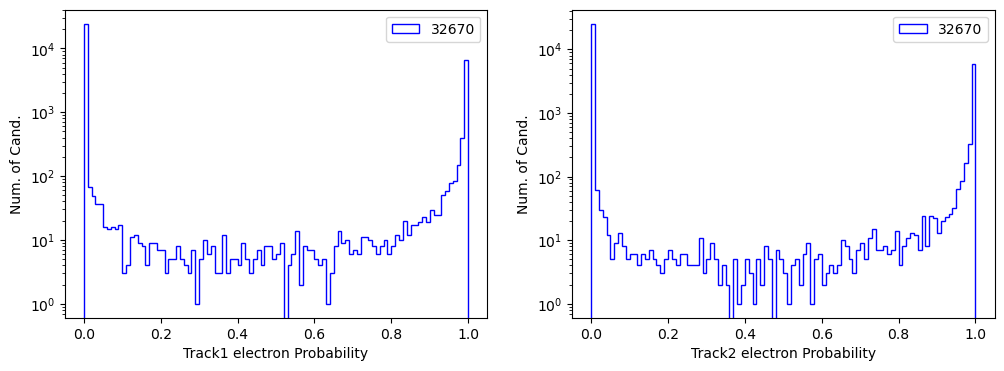

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_os['Track1_Calorimetric_elec_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax1.set_title("diTracks inv. mass")
ax1.set_xlabel('Track1 electron Probability')
ax1.set_ylabel('Num. of Cand.')
ax2.hist(data_os['Track2_Calorimetric_elec_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('Track2 electron Probability')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("two tracks with pion mass")
npipi = data_os['Track1_Calorimetric_elec_PID']
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_os['Track2_Calorimetric_elec_PID']
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "Trk12_elecProb.png",bbox_inches='tight')

In [21]:
data_os_piProb = data_os[(data_os['Track1_Calorimetric_pion_PID'] >= 0.8) & (data_os['Track2_Calorimetric_pion_PID'] >= 0.8)]

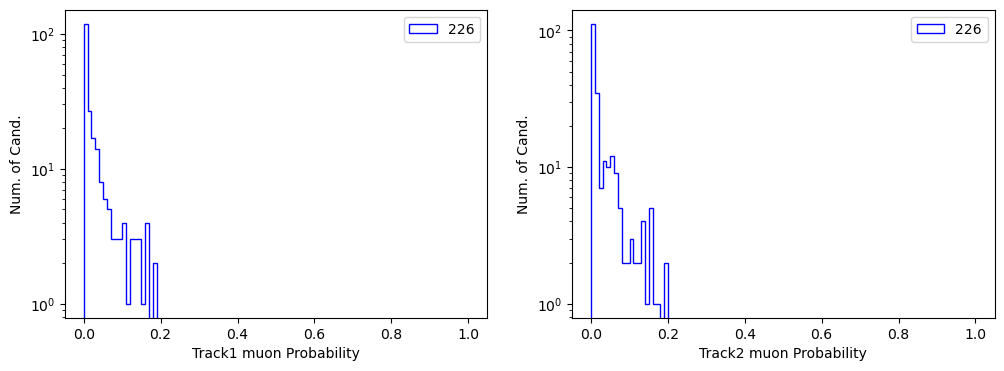

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_os_piProb['Track1_Calorimetric_muon_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax1.set_title("diTracks inv. mass")
ax1.set_xlabel('Track1 muon Probability')
ax1.set_ylabel('Num. of Cand.')
ax2.hist(data_os_piProb['Track2_Calorimetric_muon_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('Track2 muon Probability')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("two tracks with pion mass")
npipi = data_os_piProb['Track1_Calorimetric_muon_PID']
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_os_piProb['Track2_Calorimetric_muon_PID']
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "Trk12_muonProb_afterPiProb.png",bbox_inches='tight')

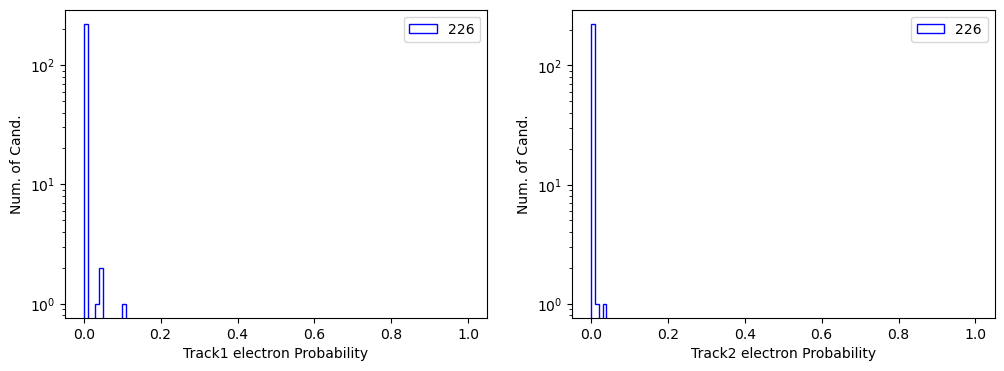

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_os_piProb['Track1_Calorimetric_elec_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax1.set_title("diTracks inv. mass")
ax1.set_xlabel('Track1 electron Probability')
ax1.set_ylabel('Num. of Cand.')
ax2.hist(data_os_piProb['Track2_Calorimetric_elec_PID'],range=(0,1),bins=100,log=True, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('Track2 electron Probability')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("two tracks with pion mass")
npipi = data_os_piProb['Track1_Calorimetric_elec_PID']
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_os_piProb['Track2_Calorimetric_elec_PID']
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "Trk12_elecProb_afterPiProb.png",bbox_inches='tight')

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/1895763809.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_os_piProb['Track1_p'], data_os_piProb['Track1_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")


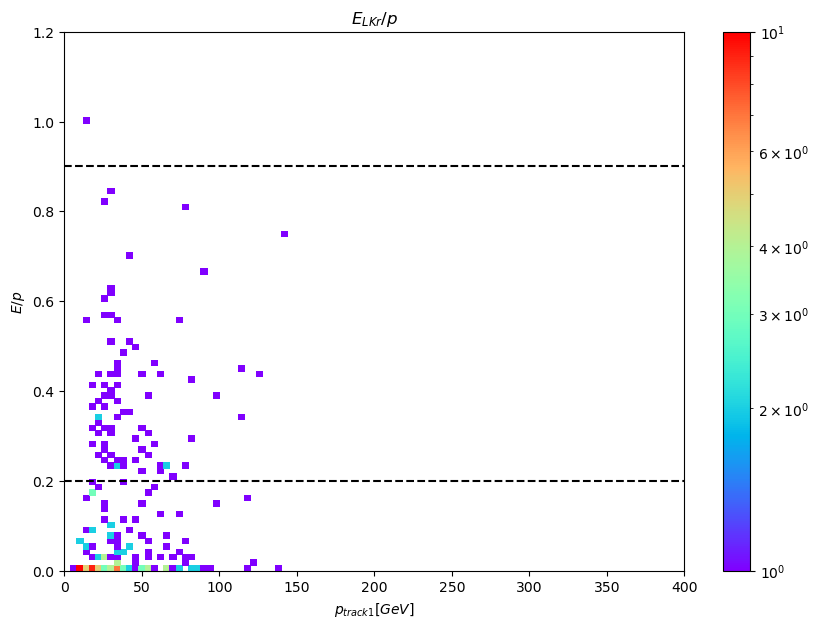

In [24]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os_piProb['Track1_p'], data_os_piProb['Track1_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")
plt.title("$E_{LKr}/p$")
plt.xlabel('$p_{track1}[GeV]$')
plt.ylabel('$E/p$')
plt.colorbar()
plt.axhline(y=0.9, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.savefig(pathPlots + "Trk1_LKrEoP_piProb.png",bbox_inches='tight')

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/3367531369.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_os_piProb['Track2_p'], data_os_piProb['Track2_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")


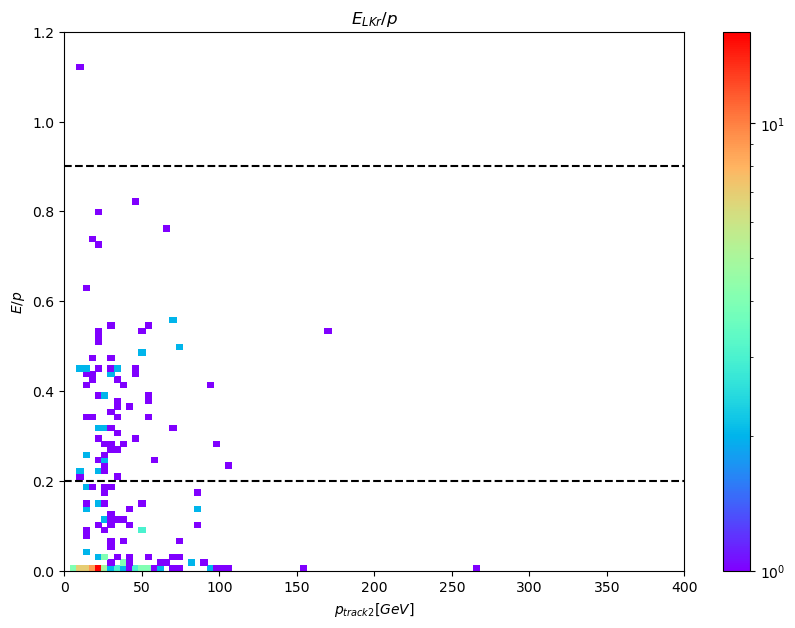

In [25]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os_piProb['Track2_p'], data_os_piProb['Track2_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")
plt.title("$E_{LKr}/p$")
plt.xlabel('$p_{track2}[GeV]$')
plt.ylabel('$E/p$')
plt.colorbar()
plt.axhline(y=0.9, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.savefig(pathPlots + "Trk2_LKrEoP_piProb.png",bbox_inches='tight')

In [26]:
piMass = 0.13957039
data_os_piProb['Track1_p_vtx'] = (data_os_piProb['Track1_3Momenta.fX']**2 + data_os_piProb['Track1_3Momenta.fY']**2 + data_os_piProb['Track1_3Momenta.fZ']**2)**(1/2)
data_os_piProb['Track2_p_vtx'] = (data_os_piProb['Track2_3Momenta.fX']**2 + data_os_piProb['Track2_3Momenta.fY']**2 + data_os_piProb['Track2_3Momenta.fZ']**2)**(1/2)

data_os_piProb['Track1_Energy_vtx'] = (piMass**2 + data_os_piProb['Track1_p_vtx']**2)**(1/2)
data_os_piProb['Track2_Energy_vtx'] = (piMass**2 + data_os_piProb['Track2_p_vtx']**2)**(1/2)

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/170068714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb['Track1_p_vtx'] = (data_os_piProb['Track1_3Momenta.fX']**2 + data_os_piProb['Track1_3Momenta.fY']**2 + data_os_piProb['Track1_3Momenta.fZ']**2)**(1/2)
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/170068714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb['Track2_p_vtx'] = (data_os_piProb['Track2_3Momenta.fX']**2 + data_os_piProb['

In [27]:
data_os_piProb[['Track1_Energy_vtx','Track2_Energy_vtx','Track1_p_vtx','Track2_p_vtx']][:5]

,Track1_Energy_vtx,Track2_Energy_vtx,Track1_p_vtx,Track2_p_vtx
entry,,,,
7935,58.387822,19.941576,58.387655,19.941088
12586,40.158039,93.810296,40.157796,93.810192
13843,27.014157,51.938841,27.013797,51.938654
13844,89.035017,51.936663,89.034907,51.936476
13845,79.946216,51.938759,79.946094,51.938572


In [28]:
pi1_p4, pi2_p4, dipi_p4 = rt.TLorentzVector(), rt.TLorentzVector(), rt.TLorentzVector()

ddd = data_os_piProb[['Track1_3Momenta.fX','Track1_3Momenta.fY','Track1_3Momenta.fZ','Track1_Energy_vtx',
                      'Track2_3Momenta.fX','Track2_3Momenta.fY','Track2_3Momenta.fZ','Track2_Energy_vtx']]

dipi_M = []
dipi_p = []
for i, p4 in enumerate(ddd.to_numpy()):
    pi1_p4.SetPxPyPzE(p4[0], p4[1], p4[2], p4[3])
    pi2_p4.SetPxPyPzE(p4[4], p4[5], p4[6], p4[7])
    dipi_p4 = pi1_p4 + pi2_p4
    dipi_M.append(dipi_p4.M())
    dipi_p.append(dipi_p4.P())

data_os_piProb.loc[:,'dipi_M'] = dipi_M
data_os_piProb.loc[:,'dipi_p'] = dipi_p

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/3255885216.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb.loc[:,'dipi_M'] = dipi_M
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/3255885216.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb.loc[:,'dipi_p'] = dipi_p


In [29]:
data_os_piProb[['dipi_p','dipi_M']][:5]

,dipi_p,dipi_M
entry,,
7935,78.328742,0.320846
12586,133.967647,0.429394
13843,78.950192,0.665697
13844,140.969467,0.789936
13845,131.884377,0.397268


In [30]:
data_os_piProb['Vertex_pos_R'] = data_os_piProb['Vertex_pos_R'].apply(lambda x:x*0.001)
data_os_piProb['Vertex_pos_R_tax'] = data_os_piProb['Vertex_pos_R_tax'].apply(lambda x:x*0.001)

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/439170679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb['Vertex_pos_R'] = data_os_piProb['Vertex_pos_R'].apply(lambda x:x*0.001)
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/439170679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb['Vertex_pos_R_tax'] = data_os_piProb['Vertex_pos_R_tax'].apply(lambda x:x*0.001)


/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/3942957557.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_os_piProb['Vertex_pos.fZ'], data_os_piProb['Vertex_pos_R'],bins=100,range=[[95,180],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")


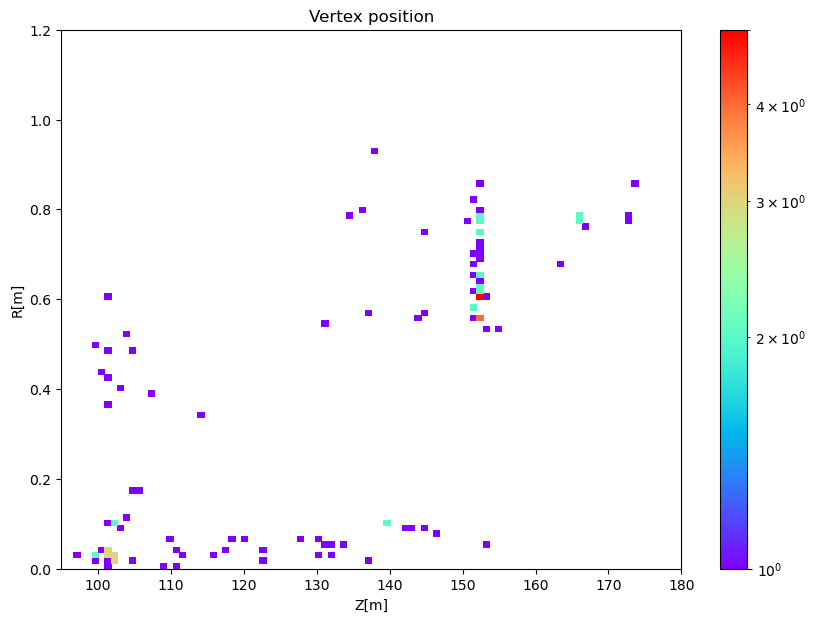

In [31]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os_piProb['Vertex_pos.fZ'], data_os_piProb['Vertex_pos_R'],bins=100,range=[[95,180],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")
plt.title("Vertex position")
plt.xlabel('Z[m]')
plt.ylabel('R[m]')
plt.colorbar()
plt.savefig(pathPlots + "vtxPos.png",bbox_inches='tight')

In [32]:
# 0: kIsInSmartFV, 1: kIsLateral, 2: kIsUpstream,
data_os_piProb['Vertex_pos_zFV'] = data_os_piProb['Vertex_pos.fZ'][data_os_piProb['Vertex_type']==0]
data_os_piProb['Vertex_pos_rFV'] = data_os_piProb['Vertex_pos_R'][data_os_piProb['Vertex_type']==0]

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/768092397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb['Vertex_pos_zFV'] = data_os_piProb['Vertex_pos.fZ'][data_os_piProb['Vertex_type']==0]
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/768092397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os_piProb['Vertex_pos_rFV'] = data_os_piProb['Vertex_pos_R'][data_os_piProb['Vertex_type']==0]


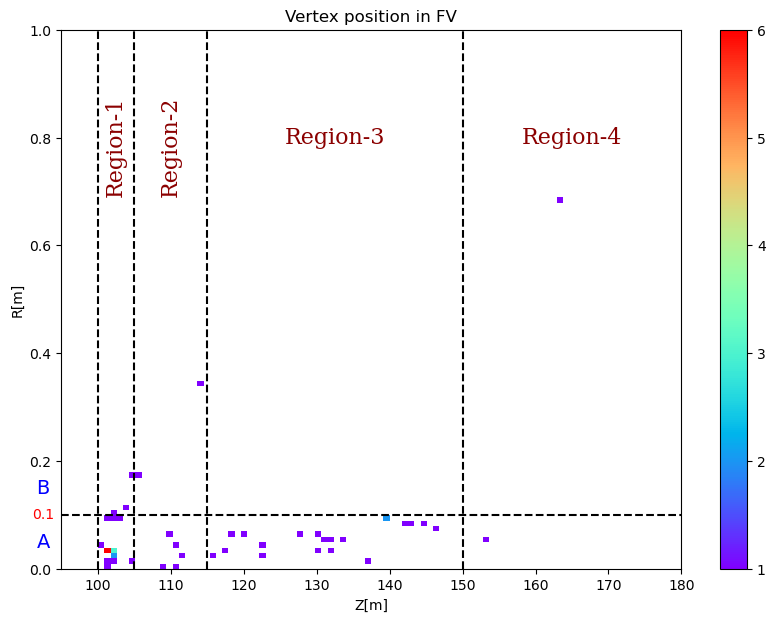

In [33]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os_piProb['Vertex_pos_zFV'], data_os_piProb['Vertex_pos_rFV'],bins=100,range=[[95,180],[0,1]],**cmap,label="All")
plt.title("Vertex position in FV")
plt.text(102.5, 0.7, "Region-1", fontdict=font,rotation='vertical',ha='center')
plt.text(110, 0.7, "Region-2", fontdict=font,rotation='vertical',ha='center')
plt.text(132.5, 0.8, "Region-3", fontdict=font,rotation='horizontal',ha='center',va='center')
plt.text(165, 0.8, "Region-4", fontdict=font,rotation='horizontal',ha='center',va='center')
plt.text(92.5, 0.1, "0.1",color='red',rotation='horizontal',ha='center',va='center')
plt.text(92.5, 0.05, "A",color='blue',size=14,rotation='horizontal',ha='center',va='center')
plt.text(92.5, 0.15, "B",color='blue',size=14,rotation='horizontal',ha='center',va='center')
plt.xlabel('Z[m]')
plt.ylabel('R[m]')
plt.colorbar()
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axvline(x=100, color='black', linestyle='--')
plt.axvline(x=105, color='black', linestyle='--')
plt.axvline(x=115, color='black', linestyle='--')
plt.axvline(x=150, color='black', linestyle='--')

plt.savefig(pathPlots + "vtxPos_FV_piEoP.png",bbox_inches='tight')

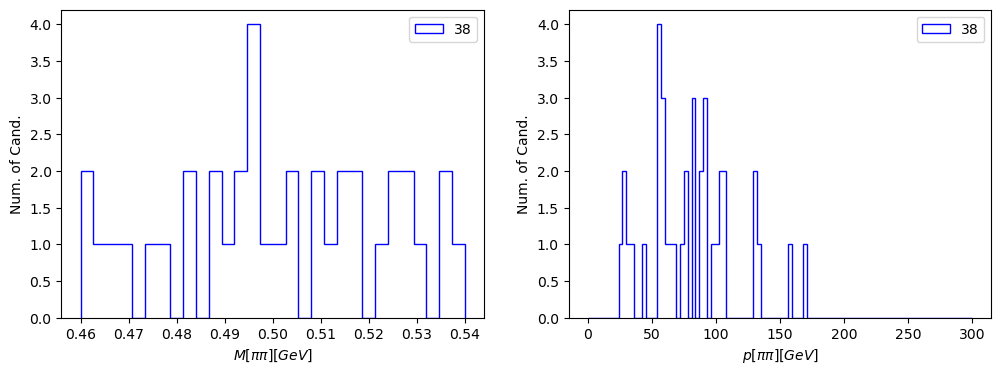

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_os_piProb['dipi_M'],range=(0.46,0.54),bins=30,log=False, color='blue', histtype='step')
#ax1.set_title("dipion inv. mass")
ax1.set_xlabel('$M[\pi\pi][GeV]$')
ax1.set_ylabel('Num. of Cand.')
pipi_p = data_os_piProb['dipi_p'][(data_os_piProb['dipi_M']>0.46) & (data_os_piProb['dipi_M']<0.54)]
ax2.hist(pipi_p,range=(0,300),bins=100,log=False, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('$p[\pi\pi][GeV]$')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("$0.2 < E_{LKr}/p < 0.9$")
npipi = data_os_piProb['dipi_M'][(data_os_piProb['dipi_M']>0.46) & (data_os_piProb['dipi_M']<0.54)]
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_os_piProb['dipi_p'][(data_os_piProb['dipi_M']>0.46) & (data_os_piProb['dipi_M']<0.54)]
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "diPi_MandP.png",bbox_inches='tight')

In [35]:
data_pipi_FV = data_os_piProb[(data_os_piProb['Vertex_type']==0) & (data_os_piProb['dipi_M']>0.35) & (data_os_piProb['dipi_M']<0.65)]

In [36]:
massWindow = (data_pipi_FV['dipi_M'] > 0.46) & (data_pipi_FV['dipi_M'] < 0.54)
regs = (data_pipi_FV['Vertex_pos_zFV'] > 100) & (data_pipi_FV['Vertex_pos_zFV'] < 180)

In [37]:
data_pipi_FV_overall = data_pipi_FV[massWindow & regs]

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/2648244713.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_pipi_FV_overall['Track1_p'], data_pipi_FV_overall['Track1_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")


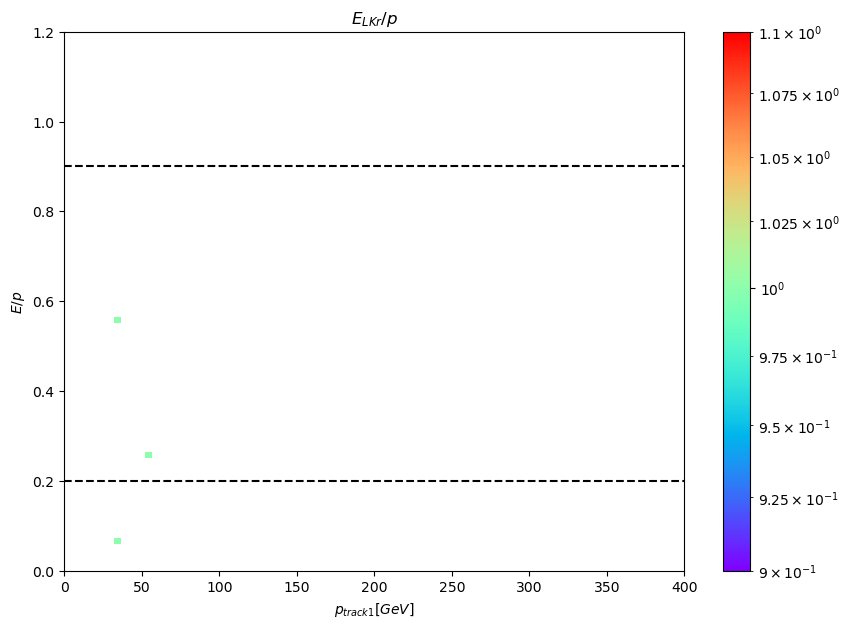

In [38]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_pipi_FV_overall['Track1_p'], data_pipi_FV_overall['Track1_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")
plt.title("$E_{LKr}/p$")
plt.xlabel('$p_{track1}[GeV]$')
plt.ylabel('$E/p$')
plt.colorbar()
plt.axhline(y=0.9, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.savefig(pathPlots + "Trk1_LKrEoP_piProb_overall.png",bbox_inches='tight')

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/3300587830.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_pipi_FV_overall['Track2_p'], data_pipi_FV_overall['Track2_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")


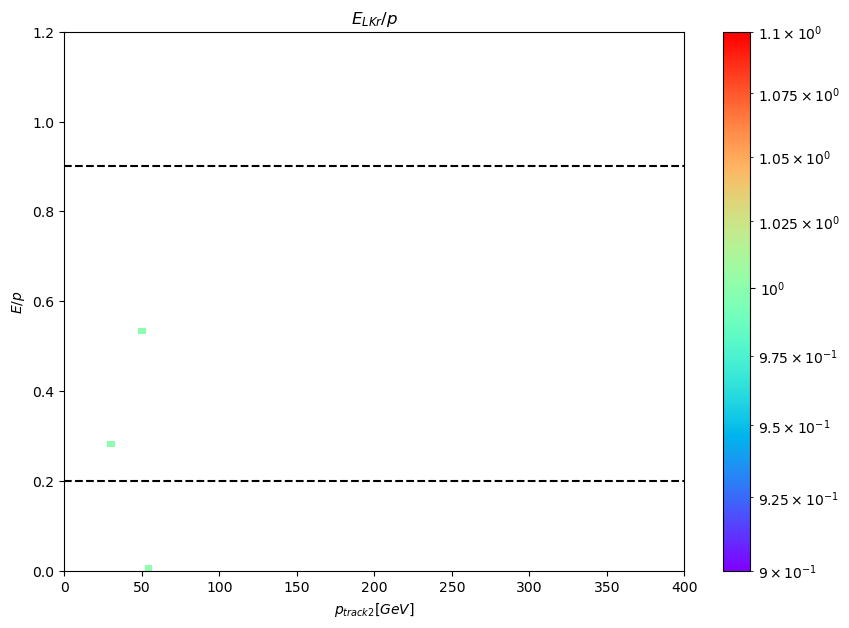

In [39]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_pipi_FV_overall['Track2_p'], data_pipi_FV_overall['Track2_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")
plt.title("$E_{LKr}/p$")
plt.xlabel('$p_{track2}[GeV]$')
plt.ylabel('$E/p$')
plt.colorbar()
plt.axhline(y=0.9, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.savefig(pathPlots + "Trk2_LKrEoP_piProb_overall.png",bbox_inches='tight')

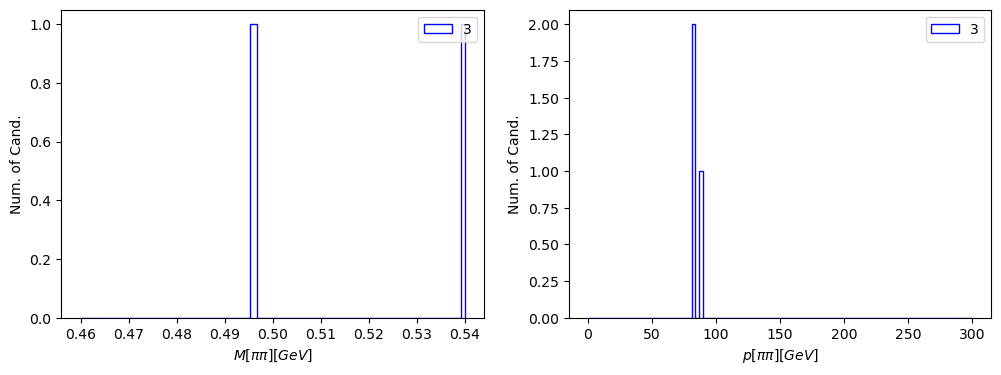

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(data_pipi_FV_overall['dipi_M'],range=(0.46,0.54),bins=100,log=False, color='blue', histtype='step')
#ax1.set_title("dipion inv. mass")
ax1.set_xlabel('$M[\pi\pi][GeV]$')
ax1.set_ylabel('Num. of Cand.')
ax2.hist(data_pipi_FV_overall['dipi_p'],range=(0,300),bins=100,log=False, color='blue', histtype='step')
#ax2.set_title("dipion momentum")
ax2.set_xlabel('$p[\pi\pi][GeV]$')
ax2.set_ylabel('Num. of Cand.')
#fig.suptitle("R > 0.1 & 150 < Z < 180")
npipi = data_pipi_FV_overall['dipi_M']
npipi = str(len(npipi))
legend1 = ax1.legend([npipi],loc=1)
npipi = data_pipi_FV_overall['dipi_p']
npipi = str(len(npipi))
legend1 = ax2.legend([npipi],loc=1)
plt.savefig(pathPlots + "diPi_MandP_Regs.png",bbox_inches='tight')

In [41]:
data_pipi_FV_overall[['Track1_MUV3Count','Track1_MUV3Count2','Track2_MUV3Count','Track2_MUV3Count2']]

,Track1_MUV3Count,Track1_MUV3Count2,Track2_MUV3Count,Track2_MUV3Count2
entry,,,,
87917,0,0,0,0
300722,0,0,0,0
2114376,0,0,0,0


In [42]:
data_pipi_FV_overall[['dipi_M','dipi_p','deltaT_trk1','deltaT_trk2','Track1_lkrEoP','Track2_lkrEoP']].style.hide(axis="index")

dipi_M,dipi_p,deltaT_trk1,deltaT_trk2,Track1_lkrEoP,Track2_lkrEoP
0.539223,87.621785,0.440390,0.649978,0.563094,0.000000
0.496352,83.426972,0.056453,0.236508,0.068884,0.534417
0.495877,82.383689,0.135017,0.156030,0.252405,0.279210


In [43]:
data_pipi_FV_overall[['dipi_M','dipi_p','pi1_ANTI0','pi1_NewCHOD','pi1_LKr','pi1_MUV1','pi1_MUV2','pi1_MUV3','pi2_ANTI0','pi2_NewCHOD','pi2_LKr','pi2_MUV1','pi2_MUV2','pi2_MUV3']].style.hide(axis="index")

dipi_M,dipi_p,pi1_ANTI0,pi1_NewCHOD,pi1_LKr,pi1_MUV1,pi1_MUV2,pi1_MUV3,pi2_ANTI0,pi2_NewCHOD,pi2_LKr,pi2_MUV1,pi2_MUV2,pi2_MUV3
0.539223,87.621785,False,True,True,True,False,False,False,True,False,True,False,False
0.496352,83.426972,False,True,True,True,False,False,False,True,True,True,False,False
0.495877,82.383689,False,True,True,True,False,False,False,True,True,True,False,False


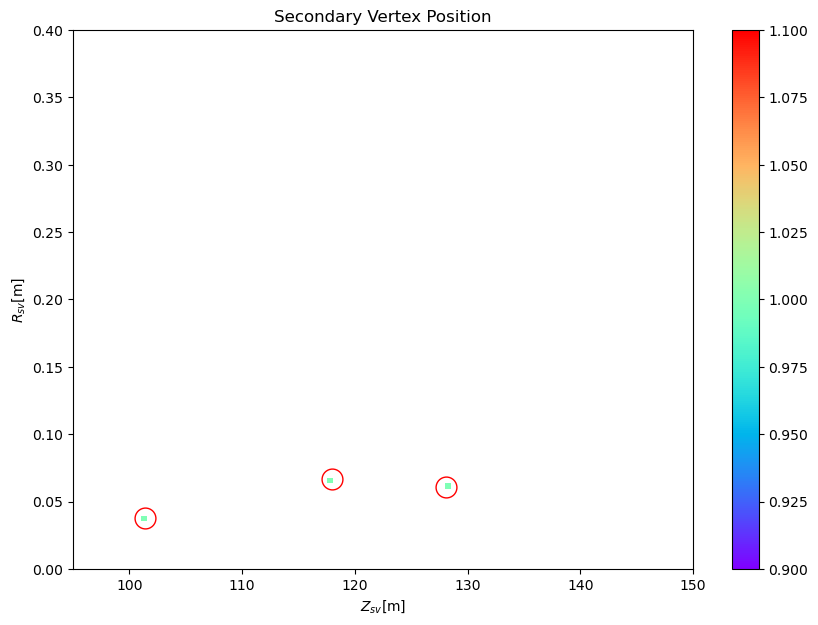

In [44]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_pipi_FV_overall['Vertex_pos_zFV'], data_pipi_FV_overall['Vertex_pos_rFV'],bins=100,range=[[95,150],[0,0.4]],**cmap,label="All")
plt.title("Secondary Vertex Position")
plt.xlabel('$Z_{sv}$[m]')
plt.ylabel('$R_{sv}$[m]')
plt.colorbar()
plt.plot(data_pipi_FV_overall['Vertex_pos_zFV'],data_pipi_FV_overall['Vertex_pos_rFV'],'o', ms=15, mec='red',mfc='none')
plt.savefig(pathPlots + "vtxPos_Regs.png",bbox_inches='tight')

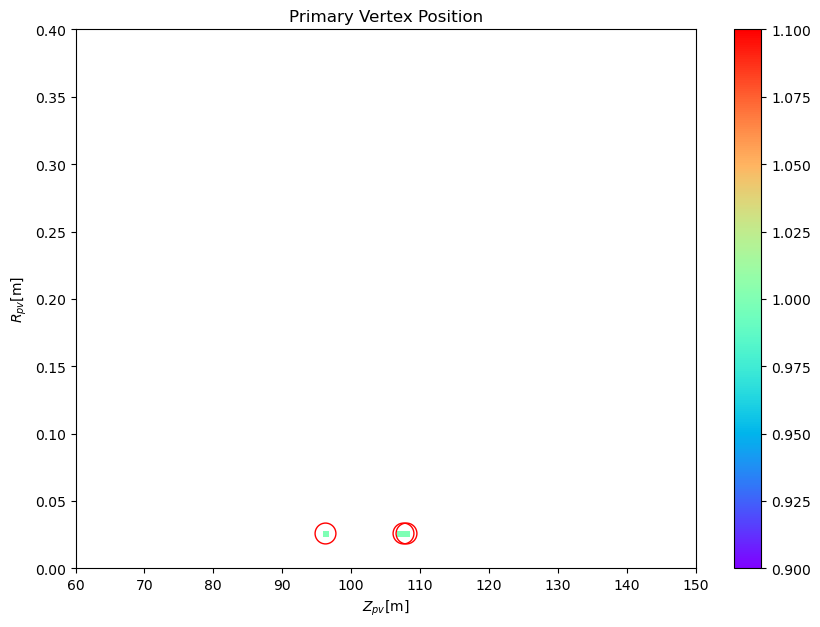

In [45]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_pipi_FV_overall['Vertex_Z_custom'], data_pipi_FV_overall['Vertex_pos_R_tax'],bins=100,range=[[60,150],[0,0.4]],**cmap,label="All")
plt.title("Primary Vertex Position")
plt.xlabel('$Z_{pv}$[m]')
plt.ylabel('$R_{pv}$[m]')
plt.colorbar()
plt.plot(data_pipi_FV_overall['Vertex_Z_custom'],data_pipi_FV_overall['Vertex_pos_R_tax'],'o', ms=15, mec='red',mfc='none')
plt.savefig(pathPlots + "vtxPos_Regs_pv.png",bbox_inches='tight')

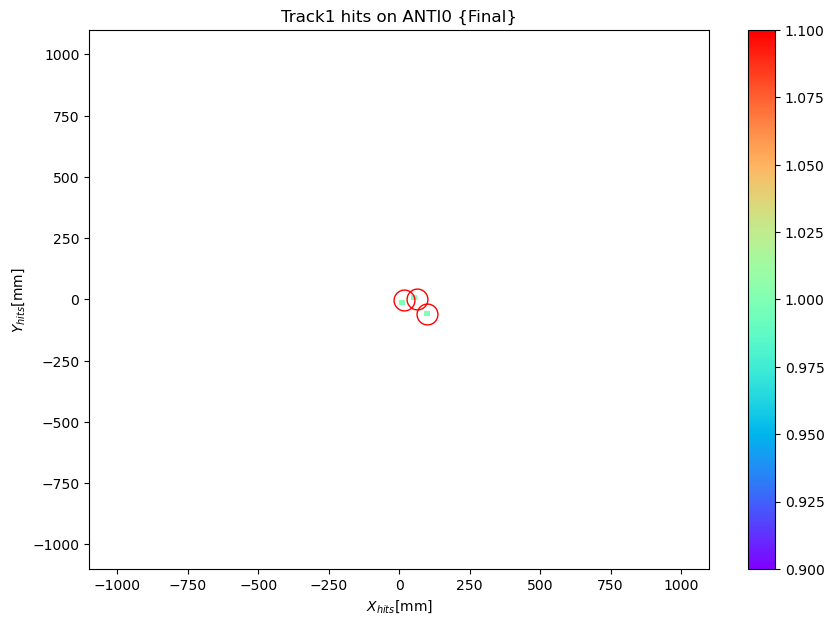

In [46]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_pipi_FV_overall['Track1_posANTI0.fX'], data_pipi_FV_overall['Track1_posANTI0.fY'],bins=100,range=[[-1100,1100],[-1100,1100]],**cmap,label="All")
plt.title("Track1 hits on ANTI0 {Final}")
plt.xlabel('$X_{hits}$[mm]')
plt.ylabel('$Y_{hits}$[mm]')
plt.colorbar()

plt.plot(data_pipi_FV_overall['Track1_posANTI0.fX'],data_pipi_FV_overall['Track1_posANTI0.fY'],'o', ms=15, mec='red',mfc='none')

plt.savefig(pathPlots + "XvsY_trk1_hitsOnANTI0_FinalProb.png",bbox_inches='tight')

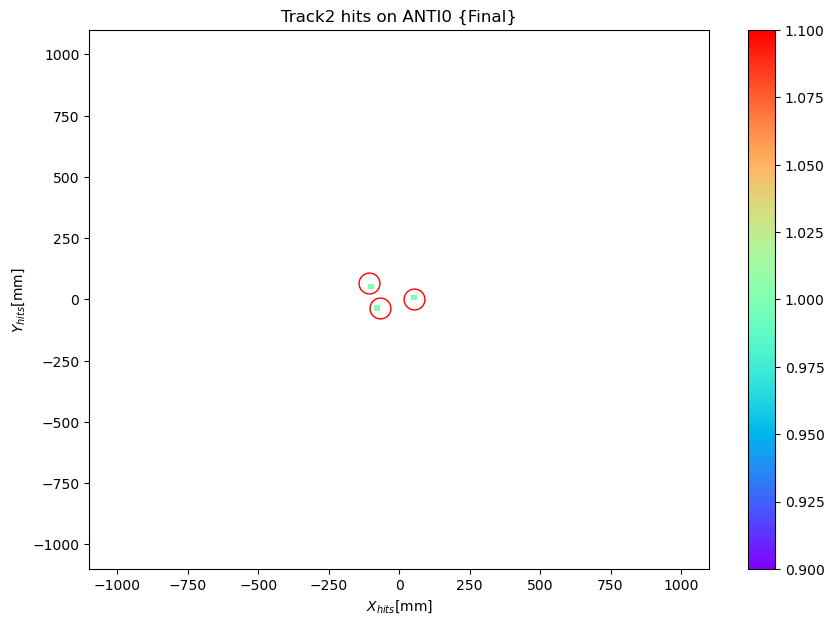

In [47]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_pipi_FV_overall['Track2_posANTI0.fX'], data_pipi_FV_overall['Track2_posANTI0.fY'],bins=100,range=[[-1100,1100],[-1100,1100]],**cmap,label="All")
plt.title("Track2 hits on ANTI0 {Final}")
plt.xlabel('$X_{hits}$[mm]')
plt.ylabel('$Y_{hits}$[mm]')
plt.colorbar()

plt.plot(data_pipi_FV_overall['Track2_posANTI0.fX'],data_pipi_FV_overall['Track2_posANTI0.fY'],'o', ms=15, mec='red',mfc='none')

plt.savefig(pathPlots + "XvsY_trk2_hitsOnANTI0_FinalProb.png",bbox_inches='tight')

In [48]:
data_pipi_FV_overall['PV_R'] = data_pipi_FV_overall['Vertex_pos_R_tax']
data_pipi_FV_overall['PV_Z'] = data_pipi_FV_overall['Vertex_Z_custom']
data_pipi_FV_overall['SV_R'] = data_pipi_FV_overall['Vertex_pos_rFV']
data_pipi_FV_overall['SV_Z'] = data_pipi_FV_overall['Vertex_pos_zFV']
data_pipi_FV_overall['pi1_ANTI0_X'] = data_pipi_FV_overall['Track1_posANTI0.fX']
data_pipi_FV_overall['pi1_ANTI0_Y'] = data_pipi_FV_overall['Track1_posANTI0.fY']
data_pipi_FV_overall['pi2_ANTI0_X'] = data_pipi_FV_overall['Track2_posANTI0.fX']
data_pipi_FV_overall['pi2_ANTI0_Y'] = data_pipi_FV_overall['Track2_posANTI0.fY']

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/2030520206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pipi_FV_overall['PV_R'] = data_pipi_FV_overall['Vertex_pos_R_tax']
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/2030520206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pipi_FV_overall['PV_Z'] = data_pipi_FV_overall['Vertex_Z_custom']
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_49614/2030520206.py:3: SettingWithCopyWarning: 
A valu

In [49]:
data_pipi_FV_overall[['dipi_M','dipi_p','PV_R','PV_Z','SV_R','SV_Z','pi1_ANTI0_X','pi1_ANTI0_Y','pi2_ANTI0_X','pi2_ANTI0_Y']].style.hide(axis="index")

dipi_M,dipi_p,PV_R,PV_Z,SV_R,SV_Z,pi1_ANTI0_X,pi1_ANTI0_Y,pi2_ANTI0_X,pi2_ANTI0_Y
0.539223,87.621785,0.026362,107.903119,0.037707,101.345090,18.644286,-2.249096,51.457613,2.802848
0.496352,83.426972,0.026083,107.499721,0.066682,117.976802,63.124573,0.017515,-67.599101,-33.804821
0.495877,82.383689,0.026495,96.246124,0.060789,128.116334,97.078822,-57.763913,-108.734393,65.895604
